In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neural_network
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [ ]:
data = pd.read_csv('data.csv')
data.dropna(inplace=True)

In [3]:
y = data['price'].as_matrix()
data.drop('price', axis=1, inplace=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
X = data.as_matrix()

In [4]:
training_samples = 20000000
# total_samples = 220000
X_train = X[:training_samples]
y_train = y[:training_samples]
# X_test = X[training_samples:total_samples]
# y_test = y[training_samples:total_samples]
X_test = X[training_samples:]
y_test = y[training_samples:]

In [5]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 637196375420.1724


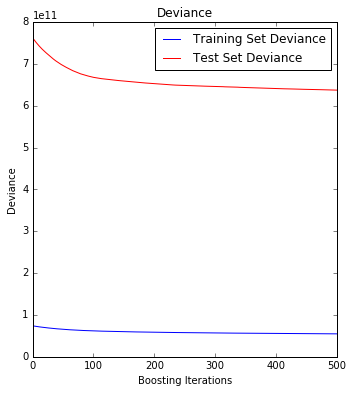

In [6]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

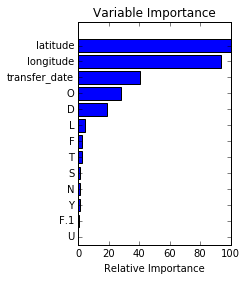

In [7]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [15]:
X_test.shape

(1154603, 13)

In [16]:
X_train[400]

array([ 80.      ,  51.704112,  -3.046052,   0.      ,   0.      ,
         0.      ,   0.      ,   1.      ,   1.      ,   0.      ,
         1.      ,   0.      ,   0.      ])

In [17]:
y_train[400]

17000

In [32]:
clf.predict(X_train[400].reshape(1, -1))

array([ 40619.32115488])

In [20]:
X_train[500]

array([ 123.      ,   53.150654,   -0.751041,    0.      ,    0.      ,
          0.      ,    1.      ,    0.      ,    1.      ,    0.      ,
          1.      ,    0.      ,    0.      ])

In [37]:
clf.predict(X_test[501222].reshape(1, -1))

array([ 386406.62762225])

In [39]:
y_test[501222]

227000

In [40]:
mse = mean_squared_error(y_test, clf.predict(X_test))

In [41]:
mse

637196375420.17236

In [45]:
help(mean_squared_error)

Help on function mean_squared_error in module sklearn.metrics.regression:

mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    Mean squared error regression loss
    
    Read more in the :ref:`User Guide <mean_squared_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape = (n_samples), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average']
        or array-like of shape (n_outputs)
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        'uniform_average' :
            Er